<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Assignment:  Machine Learning Prediction


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


In [ ]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

We will import the following libraries for the lab


In [ ]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

This function is to plot the confusion matrix.


In [ ]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])
    plt.show()

## Load the dataframe


Load the data


In [ ]:
import pandas as pd
import io
import requests

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"

# Fetching the CSV data using requests
response = requests.get(URL1)
data = pd.read_csv(io.BytesIO(response.content))

# Now `data` contains the CSV data from the URL
print(data.head())

   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   

   ReusedCount Serial   Longitude   Latitude  Class  
0            0  B0003  -80.577366  28.561857      

In [ ]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [ ]:
import pandas as pd
import io
import requests

URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'

# Fetching the CSV data using requests
response = requests.get(URL2)
data = pd.read_csv(io.BytesIO(response.content))

# Now `data` contains the CSV data from URL2
print(data.head())

   FlightNumber  PayloadMass  Flights  Block  ReusedCount  Orbit_ES-L1  \
0           1.0  6104.959412      1.0    1.0          0.0          0.0   
1           2.0   525.000000      1.0    1.0          0.0          0.0   
2           3.0   677.000000      1.0    1.0          0.0          0.0   
3           4.0   500.000000      1.0    1.0          0.0          0.0   
4           5.0  3170.000000      1.0    1.0          0.0          0.0   

   Orbit_GEO  Orbit_GTO  Orbit_HEO  Orbit_ISS  ...  Serial_B1058  \
0        0.0        0.0        0.0        0.0  ...           0.0   
1        0.0        0.0        0.0        0.0  ...           0.0   
2        0.0        0.0        0.0        1.0  ...           0.0   
3        0.0        0.0        0.0        0.0  ...           0.0   
4        0.0        1.0        0.0        0.0  ...           0.0   

   Serial_B1059  Serial_B1060  Serial_B1062  GridFins_False  GridFins_True  \
0           0.0           0.0           0.0             1.0         

In [ ]:
import pandas as pd
import io
import requests

URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'

# Fetching the CSV data using requests
response = requests.get(URL2)
X = pd.read_csv(io.BytesIO(response.content))

# Now `X` contains the CSV data from URL2
print(X.head(100))  # Displaying the first 100 rows of the DataFrame `X`

    FlightNumber   PayloadMass  Flights  Block  ReusedCount  Orbit_ES-L1  \
0            1.0   6104.959412      1.0    1.0          0.0          0.0   
1            2.0    525.000000      1.0    1.0          0.0          0.0   
2            3.0    677.000000      1.0    1.0          0.0          0.0   
3            4.0    500.000000      1.0    1.0          0.0          0.0   
4            5.0   3170.000000      1.0    1.0          0.0          0.0   
..           ...           ...      ...    ...          ...          ...   
85          86.0  15400.000000      2.0    5.0          2.0          0.0   
86          87.0  15400.000000      3.0    5.0          2.0          0.0   
87          88.0  15400.000000      6.0    5.0          5.0          0.0   
88          89.0  15400.000000      3.0    5.0          2.0          0.0   
89          90.0   3681.000000      1.0    5.0          0.0          0.0   

    Orbit_GEO  Orbit_GTO  Orbit_HEO  Orbit_ISS  ...  Serial_B1058  \
0         0.0     

## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [ ]:
import pandas as pd

# URL for the dataset
URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"

# Read the dataset from the URL
data = pd.read_csv(URL1)

# Create a Pandas Series from the column 'Class'
Y = data['Class']

# Convert the Pandas Series to a NumPy array
Y = Y.to_numpy()

# Now 'Y' is a NumPy array containing the values from the 'Class' column
print(Y)

[0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1
 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1]


## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [ ]:
import pandas as pd
from sklearn import preprocessing
import io
import requests

# URLs for the datasets
URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'

# Read dataset_part_2.csv from URL1
response1 = requests.get(URL1)
data1 = pd.read_csv(io.BytesIO(response1.content))

# Read dataset_part_3.csv from URL2
response2 = requests.get(URL2)
data2 = pd.read_csv(io.BytesIO(response2.content))

# Assuming X is a DataFrame created from data1 and data2, concatenate if necessary
X = pd.concat([data1, data2], axis=0)

# Identify numeric columns
numeric_columns = X.select_dtypes(include=['number']).columns

# Initialize StandardScaler
transform = preprocessing.StandardScaler()

# Standardize only the numeric columns
X[numeric_columns] = transform.fit_transform(X[numeric_columns])

# Now X is standardized using StandardScaler and can be used further in your analysis
print(X.head())

   FlightNumber        Date BoosterVersion   PayloadMass Orbit    LaunchSite  \
0     -1.712912  2010-06-04       Falcon 9 -1.948145e-16   LEO  CCAFS SLC 40   
1     -1.674419  2012-05-22       Falcon 9 -1.195232e+00   LEO  CCAFS SLC 40   
2     -1.635927  2013-03-01       Falcon 9 -1.162673e+00   ISS  CCAFS SLC 40   
3     -1.597434  2013-09-29       Falcon 9 -1.200587e+00    PO   VAFB SLC 4E   
4     -1.558942  2013-12-03       Falcon 9 -6.286706e-01   GTO  CCAFS SLC 40   

       Outcome   Flights GridFins Reused  ... Serial_B1058 Serial_B1059  \
0    None None -0.653913    False  False  ...          NaN          NaN   
1    None None -0.653913    False  False  ...          NaN          NaN   
2    None None -0.653913    False  False  ...          NaN          NaN   
3  False Ocean -0.653913    False  False  ...          NaN          NaN   
4    None None -0.653913    False  False  ...          NaN          NaN   

   Serial_B1060  Serial_B1062 GridFins_False  GridFins_True  Reused_

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# URLs for the datasets
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"

# Load dataset_part_2.csv
data_part_2 = pd.read_csv(URL1)

# Load dataset_part_3.csv
data_part_3 = pd.read_csv(URL2)

# Inspect the columns to understand their structure
print("Columns in data_part_2:")
print(data_part_2.columns)

print("\nColumns in data_part_3:")
print(data_part_3.columns)

# Assuming X and Y are defined based on your specific use case
# Replace 'column1', 'column2', etc., with the actual columns you want to use

# Example: Using FlightNumber, PayloadMass, and Flights from data_part_2
# and Orbit_ES-L1, Orbit_GEO, and Orbit_GTO from data_part_3
X = pd.concat([data_part_2[['FlightNumber', 'PayloadMass', 'Flights']],
               data_part_3[['Orbit_ES-L1', 'Orbit_GEO', 'Orbit_GTO']]], axis=1)

Y = data_part_3['PayloadMass']  # Replace 'PayloadMass' with the actual target column

# Split the data into training and test sets
# Set test_size to 0.2 for 20% test data and random_state to 2 for reproducibility
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Now X_train, X_test, Y_train, Y_test contain the split data

Columns in data_part_2:
Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude',
       'Class'],
      dtype='object')

Columns in data_part_3:
Index(['FlightNumber', 'PayloadMass', 'Flights', 'Block', 'ReusedCount',
       'Orbit_ES-L1', 'Orbit_GEO', 'Orbit_GTO', 'Orbit_HEO', 'Orbit_ISS',
       'Orbit_LEO', 'Orbit_MEO', 'Orbit_PO', 'Orbit_SO', 'Orbit_SSO',
       'Orbit_VLEO', 'LaunchSite_CCAFS SLC 40', 'LaunchSite_KSC LC 39A',
       'LaunchSite_VAFB SLC 4E', 'LandingPad_5e9e3032383ecb267a34e7c7',
       'LandingPad_5e9e3032383ecb554034e7c9',
       'LandingPad_5e9e3032383ecb6bb234e7ca',
       'LandingPad_5e9e3032383ecb761634e7cb',
       'LandingPad_5e9e3033383ecbb9e534e7cc', 'Serial_B0003', 'Serial_B0005',
       'Serial_B0007', 'Serial_B1003', 'Serial_B1004', 'Serial_B1005',
       'Serial_B1006', 'Serial_B1007'

we can see we only have 18 test samples.


In [ ]:
# Adjusting test_size to 0.1 for a larger training set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=2)

## TASK  4


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [ ]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

# Assuming Y_train is a continuous variable (e.g., float or integer)
# Convert Y_train to categorical labels
label_encoder = LabelEncoder()
Y_train_categorical = label_encoder.fit_transform(pd.cut(Y_train, bins=3, labels=['low', 'medium', 'high']))

# Define parameters for GridSearchCV
parameters = {
    "C": [0.01, 0.1, 1],
    "penalty": ["l2"],
    "solver": ["lbfgs"]
}

# Create a Logistic Regression model
lr = LogisticRegression()

# Create GridSearchCV object
logreg_cv = GridSearchCV(lr, parameters, cv=10)

# Fit GridSearchCV
logreg_cv.fit(X_train, Y_train_categorical)  # Use Y_train_categorical for classification

# Get best parameters and best score
best_params = logreg_cv.best_params_
best_score = logreg_cv.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Score: 0.9


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [ ]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.9


## TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# Load the datasets
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"

data_part_2 = pd.read_csv(URL1)
data_part_3 = pd.read_csv(URL2)

# Define features and target
X = pd.concat([data_part_2[['FlightNumber', 'PayloadMass', 'Flights', 'Block', 'ReusedCount']],
               data_part_3.drop(columns=['FlightNumber', 'PayloadMass', 'Flights', 'Block', 'ReusedCount'])], axis=1)
Y = data_part_2['Class']

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Convert Y_train and Y_test to categorical labels
label_encoder = LabelEncoder()
Y_train_categorical = label_encoder.fit_transform(Y_train)
Y_test_categorical = label_encoder.transform(Y_test)

# Create logistic regression object
parameters = {"C": [0.01, 0.1, 1], 'penalty': ['l2'], 'solver': ['lbfgs']}
lr = LogisticRegression()

# Create GridSearchCV object
logreg_cv = GridSearchCV(lr, parameters, cv=10)

# Fit the GridSearchCV
logreg_cv.fit(X_train, Y_train_categorical)

# Calculate accuracy on the test data
accuracy = logreg_cv.score(X_test, Y_test_categorical)

print("Accuracy on test data:", accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Accuracy on test data: 0.8333333333333334


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Lets look at the confusion matrix:


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Accuracy on test data: 0.8333333333333334


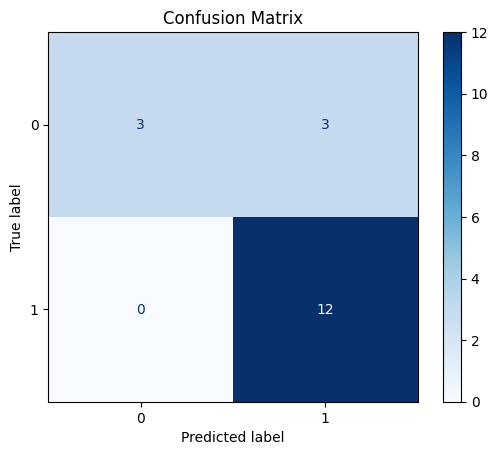

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the datasets
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"

data_part_2 = pd.read_csv(URL1)
data_part_3 = pd.read_csv(URL2)

# Define features and target
X = pd.concat([data_part_2[['FlightNumber', 'PayloadMass', 'Flights', 'Block', 'ReusedCount']],
               data_part_3.drop(columns=['FlightNumber', 'PayloadMass', 'Flights', 'Block', 'ReusedCount'])], axis=1)
Y = data_part_2['Class']

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Convert Y_train and Y_test to categorical labels
label_encoder = LabelEncoder()
Y_train_categorical = label_encoder.fit_transform(Y_train)
Y_test_categorical = label_encoder.transform(Y_test)

# Create logistic regression object
parameters = {"C": [0.01, 0.1, 1], 'penalty': ['l2'], 'solver': ['lbfgs']}
lr = LogisticRegression()

# Create GridSearchCV object
logreg_cv = GridSearchCV(lr, parameters, cv=10)

# Fit the GridSearchCV
logreg_cv.fit(X_train, Y_train_categorical)

# Calculate accuracy on the test data
accuracy = logreg_cv.score(X_test, Y_test_categorical)
print("Accuracy on test data:", accuracy)

# Predict on test data
yhat = logreg_cv.predict(X_test)

# Plot the confusion matrix
cm = confusion_matrix(Y_test_categorical, yhat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the major problem is false positives.


## TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load a dataset (e.g., Iris dataset)
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an SVM object
svm = SVC()

# Define the parameter grid to search over
parameters = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

# Create a GridSearchCV object with cv = 10
svm_cv = GridSearchCV(estimator=svm, param_grid=parameters, cv=10, scoring='accuracy')

# Fit the GridSearchCV object to the training data to find the best parameters
svm_cv.fit(X_train, y_train)

# Print the best parameters and the best score
print(f"Best Parameters: {svm_cv.best_params_}")
print(f"Best Score: {svm_cv.best_score_}")

# Evaluate the best model on the test set
best_model = svm_cv.best_estimator_
y_pred = best_model.predict(X_test)
print(f"Test Set Accuracy: {accuracy_score(y_test, y_pred)}")

Best Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best Score: 0.9727272727272727
Test Set Accuracy: 1.0


In [2]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
accuracy : 0.9727272727272727


## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


In [3]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load a dataset (e.g., Iris dataset)
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an SVM object
svm = SVC()

# Define the parameter grid to search over
parameters = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

# Create a GridSearchCV object with cv = 10
svm_cv = GridSearchCV(estimator=svm, param_grid=parameters, cv=10, scoring='accuracy')

# Fit the GridSearchCV object to the training data to find the best parameters
svm_cv.fit(X_train, y_train)

# Print the best parameters and the best score
print(f"Best Parameters: {svm_cv.best_params_}")
print(f"Best Score: {svm_cv.best_score_}")

# Evaluate the best model on the test set using the score method
test_accuracy = svm_cv.score(X_test, y_test)
print(f"Test Set Accuracy: {test_accuracy}")

Best Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best Score: 0.9727272727272727
Test Set Accuracy: 1.0


We can plot the confusion matrix


Best Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best Score: 0.9727272727272727
Test Set Accuracy: 1.0


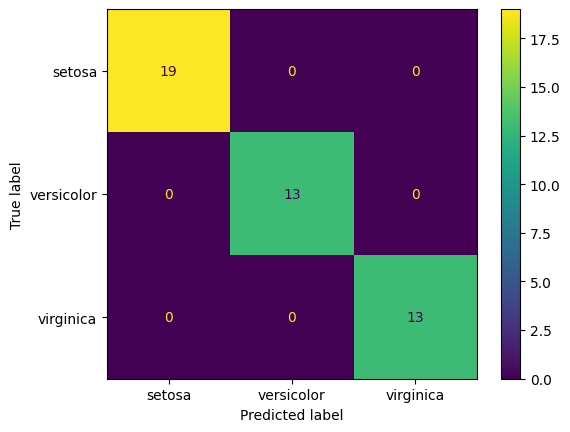

In [6]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Load a dataset (e.g., Iris dataset)
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an SVM object
svm = SVC()

# Define the parameter grid to search over
parameters = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

# Create a GridSearchCV object with cv = 10
svm_cv = GridSearchCV(estimator=svm, param_grid=parameters, cv=10, scoring='accuracy')

# Fit the GridSearchCV object to the training data to find the best parameters
svm_cv.fit(X_train, y_train)

# Print the best parameters and the best score
print(f"Best Parameters: {svm_cv.best_params_}")
print(f"Best Score: {svm_cv.best_score_}")

# Evaluate the best model on the test set using the score method
test_accuracy = svm_cv.score(X_test, y_test)
print(f"Test Set Accuracy: {test_accuracy}")

# Predict on the test set
yhat = svm_cv.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, yhat)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap='viridis')

## TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_feat

Best Parameters: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'splitter': 'best'}
Best Score: 0.9627272727272727
Test Set Accuracy: 1.0


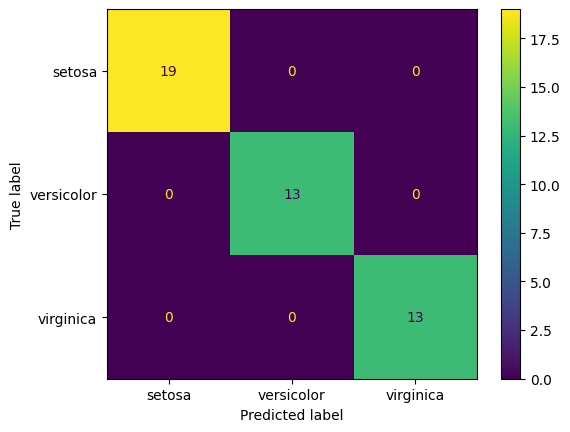

In [8]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Load a dataset (e.g., Iris dataset)
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid to search over
parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2*n for n in range(1, 10)],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

# Create a DecisionTreeClassifier object
tree = DecisionTreeClassifier()

# Create a GridSearchCV object with cv = 10
tree_cv = GridSearchCV(estimator=tree, param_grid=parameters, cv=10, scoring='accuracy')

# Fit the GridSearchCV object to the training data to find the best parameters
tree_cv.fit(X_train, y_train)

# Print the best parameters and the best score
print(f"Best Parameters: {tree_cv.best_params_}")
print(f"Best Score: {tree_cv.best_score_}")

# Evaluate the best model on the test set using the score method
test_accuracy = tree_cv.score(X_test, y_test)
print(f"Test Set Accuracy: {test_accuracy}")

# Predict on the test set
yhat = tree_cv.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, yhat)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap='viridis')

In [9]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'splitter': 'best'}
accuracy : 0.9627272727272727


## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_feat

Best Parameters: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'random'}
Best Score: 0.9627272727272727
Test Set Accuracy: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


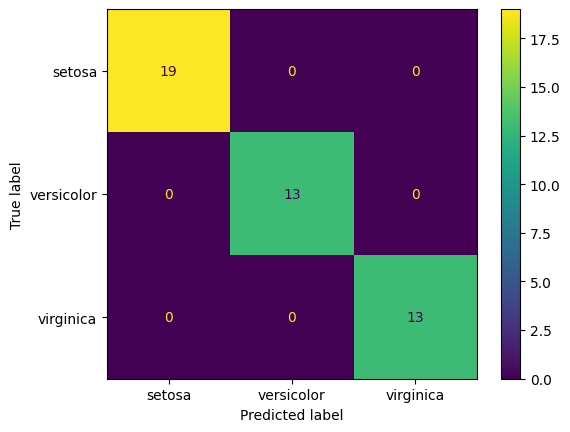

In [10]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Load a dataset (e.g., Iris dataset)
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid to search over
parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2*n for n in range(1, 10)],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

# Create a DecisionTreeClassifier object
tree = DecisionTreeClassifier()

# Create a GridSearchCV object with cv = 10
tree_cv = GridSearchCV(estimator=tree, param_grid=parameters, cv=10, scoring='accuracy')

# Fit the GridSearchCV object to the training data to find the best parameters
tree_cv.fit(X_train, y_train)

# Print the best parameters and the best score
print(f"Best Parameters: {tree_cv.best_params_}")
print(f"Best Score: {tree_cv.best_score_}")

# Evaluate the best model on the test set using the score method
test_accuracy = tree_cv.score(X_test, y_test)
print(f"Test Set Accuracy: {test_accuracy}")

# Predict on the test set
yhat = tree_cv.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, yhat)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap='viridis')

We can plot the confusion matrix


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_feat

Best Parameters: {'criterion': 'gini', 'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'best'}
Best Score: 0.9636363636363636
Test Set Accuracy: 0.9777777777777777


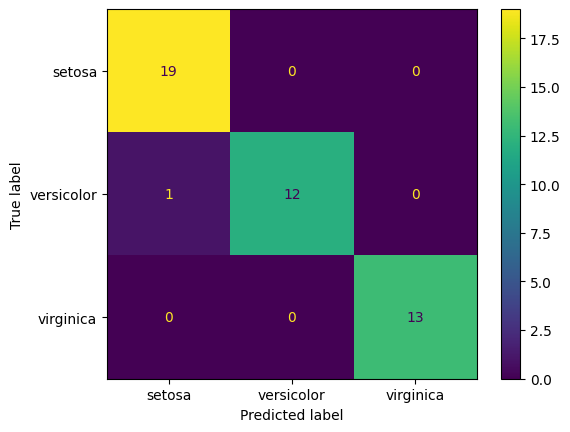

In [12]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load a dataset (e.g., Iris dataset)
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid to search over
parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2*n for n in range(1, 10)],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

# Create a DecisionTreeClassifier object
tree = DecisionTreeClassifier()

# Create a GridSearchCV object with cv = 10
tree_cv = GridSearchCV(estimator=tree, param_grid=parameters, cv=10, scoring='accuracy')

# Fit the GridSearchCV object to the training data to find the best parameters
tree_cv.fit(X_train, y_train)

# Print the best parameters and the best score
print(f"Best Parameters: {tree_cv.best_params_}")
print(f"Best Score: {tree_cv.best_score_}")

# Evaluate the best model on the test set using the score method
test_accuracy = tree_cv.score(X_test, y_test)
print(f"Test Set Accuracy: {test_accuracy}")

# Predict on the test set
yhat = tree_cv.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, yhat)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap='viridis')

## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


Best Parameters: {'algorithm': 'auto', 'n_neighbors': 9, 'p': 2}
Best Score: 0.9536363636363637
Test Set Accuracy: 1.0


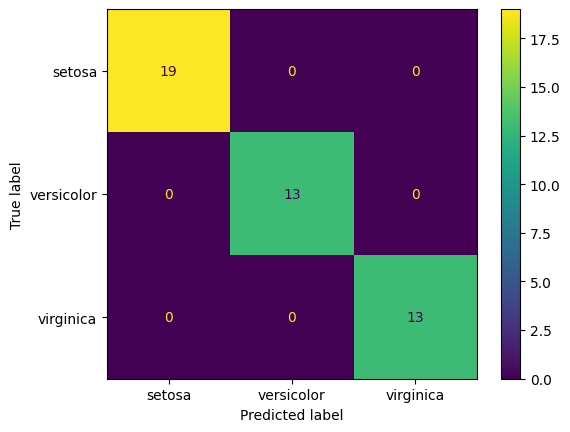

In [14]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Load a dataset (e.g., Iris dataset)
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid to search over
parameters = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

# Create a KNeighborsClassifier object
KNN = KNeighborsClassifier()

# Create a GridSearchCV object with cv = 10
knn_cv = GridSearchCV(estimator=KNN, param_grid=parameters, cv=10, scoring='accuracy')

# Fit the GridSearchCV object to the training data to find the best parameters
knn_cv.fit(X_train, y_train)

# Print the best parameters and the best score
print(f"Best Parameters: {knn_cv.best_params_}")
print(f"Best Score: {knn_cv.best_score_}")

# Evaluate the best model on the test set using the score method
test_accuracy = knn_cv.score(X_test, y_test)
print(f"Test Set Accuracy: {test_accuracy}")

# Predict on the test set
yhat = knn_cv.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, yhat)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap='viridis')

In [15]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 9, 'p': 2}
accuracy : 0.9536363636363637


## TASK  11


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


Best Parameters: {'algorithm': 'auto', 'n_neighbors': 9, 'p': 2}
Best Score: 0.9536363636363637
Test Set Accuracy: 1.0


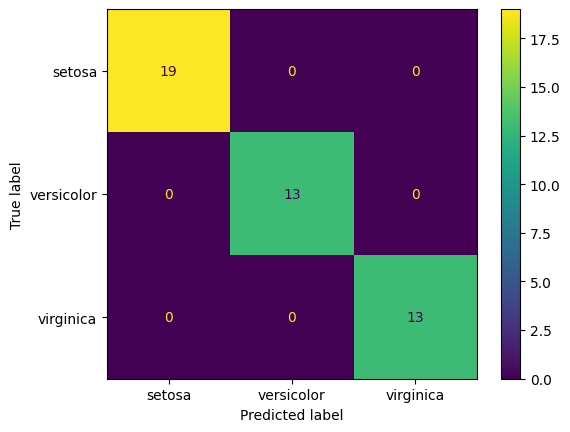

In [16]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Load a dataset (e.g., Iris dataset)
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid to search over
parameters = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

# Create a KNeighborsClassifier object
KNN = KNeighborsClassifier()

# Create a GridSearchCV object with cv = 10
knn_cv = GridSearchCV(estimator=KNN, param_grid=parameters, cv=10, scoring='accuracy')

# Fit the GridSearchCV object to the training data to find the best parameters
knn_cv.fit(X_train, y_train)

# Print the best parameters and the best score
print(f"Best Parameters: {knn_cv.best_params_}")
print(f"Best Score: {knn_cv.best_score_}")

# Evaluate the best model on the test set using the score method
test_accuracy = knn_cv.score(X_test, y_test)
print(f"Test Set Accuracy: {test_accuracy}")

# Predict on the test set
yhat = knn_cv.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, yhat)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap='viridis')

We can plot the confusion matrix


Best Parameters: {'algorithm': 'auto', 'n_neighbors': 9, 'p': 2}
Best Score: 0.9536363636363637
Test Set Accuracy: 1.0


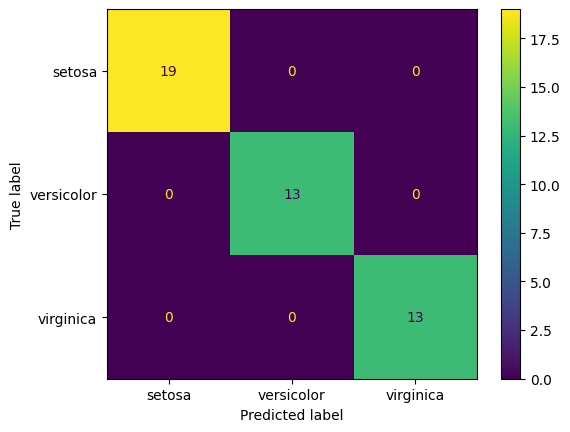

In [18]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load a dataset (e.g., Iris dataset)
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid to search over
parameters = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

# Create a KNeighborsClassifier object
KNN = KNeighborsClassifier()

# Create a GridSearchCV object with cv = 10
knn_cv = GridSearchCV(estimator=KNN, param_grid=parameters, cv=10, scoring='accuracy')

# Fit the GridSearchCV object to the training data to find the best parameters
knn_cv.fit(X_train, y_train)

# Print the best parameters and the best score
print(f"Best Parameters: {knn_cv.best_params_}")
print(f"Best Score: {knn_cv.best_score_}")

# Evaluate the best model on the test set using the score method
test_accuracy = knn_cv.score(X_test, y_test)
print(f"Test Set Accuracy: {test_accuracy}")

# Predict on the test set
yhat = knn_cv.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, yhat)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap='viridis')

## TASK  12


Find the method performs best:


In [19]:
# Print the best score for Decision Tree Classifier
print(f"Best Score for Decision Tree Classifier: {tree_cv.best_score_}")

# Print the best score for K-Nearest Neighbors Classifier
print(f"Best Score for K-Nearest Neighbors Classifier: {knn_cv.best_score_}")

Best Score for Decision Tree Classifier: 0.9636363636363636
Best Score for K-Nearest Neighbors Classifier: 0.9536363636363637


## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/)


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
